In [59]:
DATA_FOLDER = '/Users/dmytromindra/Projects/prj-nlp-2020/students/DmytroMindra/12-nlg/data/'

EN_DEV_PATH = DATA_FOLDER + 'en-dev.txt'
EN_TEST_PATH = DATA_FOLDER + 'en-test.txt'
EN_TRAIN_PATH = DATA_FOLDER + 'en-train-100K.txt'

In [22]:
!pip install keras

  Using cached Keras-2.3.1-py2.py3-none-any.whl (377 kB)
  Using cached scipy-1.4.1-cp38-cp38-macosx_10_9_x86_64.whl (28.8 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
Processing /Users/dmytromindra/Library/Caches/pip/wheels/13/90/db/290ab3a34f2ef0b5a0f89235dc2d40fea83e77de84ed2dc05c/PyYAML-5.3.1-cp38-cp38-macosx_10_9_x86_64.whl
  Using cached numpy-1.18.4-cp38-cp38-macosx_10_9_x86_64.whl (15.2 MB)
  Using cached Keras_Applications-1.0.8-py3-none-any.whl (50 kB)
  Using cached h5py-2.10.0-cp38-cp38-macosx_10_9_x86_64.whl (3.0 MB)


In [143]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [146]:
batch_size = 64  # Batch size for training.
epochs = 100  # Number of epochs to train for.
latent_dim = 256  # Latent dimensionality of the encoding space.
num_samples = 10000  # Number of samples to train on.

In [147]:
import csv

# Vectorize the data.
input_texts = []
target_texts = []
input_characters = set()
target_characters = set()

def add_data(input_text,target_text):
    global input_texts
    global target_texts
    global input_characters
    global target_characters
    
    input_texts.append(input_text)
    target_texts.append(target_text)
    for char in input_text:
        if char not in input_characters:
            input_characters.add(char)
    for char in target_text:
        if char not in target_characters:
            target_characters.add(char)    

counter = 0 
with open(EN_TRAIN_PATH) as tsvfile:
  reader = csv.DictReader(tsvfile, dialect='excel-tab')
  for row in reader:
    input_text = '^'+row['t1']+'⊗'
    target_text = '^'+row['t2']+'⊗'
    if counter<num_samples:
        add_data(input_text, target_text)
        counter += 1

print ('input_texts',len(input_texts))
print ('input_characters',len(input_characters))

print ('target_texts',len(target_texts))
print ('target_characters',len(target_characters))

print (input_texts[20])

input_texts 10000
input_characters 83
target_texts 10000
target_characters 102
^Welcome to reality .⊗


In [148]:
input_characters = sorted(list(input_characters))
target_characters = sorted(list(target_characters))
num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_characters)
max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in target_texts])

print('Number of samples:', len(input_texts))
print('Number of unique input tokens:', num_encoder_tokens)
print('Number of unique output tokens:', num_decoder_tokens)
print('Max sequence length for inputs:', max_encoder_seq_length)
print('Max sequence length for outputs:', max_decoder_seq_length)

Number of samples: 10000
Number of unique input tokens: 83
Number of unique output tokens: 102
Max sequence length for inputs: 123
Max sequence length for outputs: 126


In [149]:
input_token_index = dict(
    [(char, i) for i, char in enumerate(input_characters)])
target_token_index = dict(
    [(char, i) for i, char in enumerate(target_characters)])

print (input_token_index)
print (target_token_index)

{' ': 0, '!': 1, '"': 2, '$': 3, "'": 4, ',': 5, '-': 6, '.': 7, '/': 8, '0': 9, '1': 10, '2': 11, '3': 12, '4': 13, '5': 14, '6': 15, '7': 16, '8': 17, '9': 18, ':': 19, '?': 20, '@': 21, 'A': 22, 'B': 23, 'C': 24, 'D': 25, 'E': 26, 'F': 27, 'G': 28, 'H': 29, 'I': 30, 'J': 31, 'K': 32, 'L': 33, 'M': 34, 'N': 35, 'O': 36, 'P': 37, 'Q': 38, 'R': 39, 'S': 40, 'T': 41, 'U': 42, 'V': 43, 'W': 44, 'X': 45, 'Y': 46, 'Z': 47, '^': 48, 'a': 49, 'b': 50, 'c': 51, 'd': 52, 'e': 53, 'f': 54, 'g': 55, 'h': 56, 'i': 57, 'j': 58, 'k': 59, 'l': 60, 'm': 61, 'n': 62, 'o': 63, 'p': 64, 'q': 65, 'r': 66, 's': 67, 't': 68, 'u': 69, 'v': 70, 'w': 71, 'x': 72, 'y': 73, 'z': 74, '|': 75, 'é': 76, 'ï': 77, 'ó': 78, 'ν': 79, 'ο': 80, '\u200b': 81, '⊗': 82}
{' ': 0, '"': 1, '$': 2, "'": 3, ',': 4, '-': 5, '.': 6, '0': 7, '1': 8, '2': 9, '3': 10, '4': 11, '6': 12, '7': 13, '9': 14, ':': 15, '?': 16, 'A': 17, 'B': 18, 'C': 19, 'D': 20, 'E': 21, 'F': 22, 'G': 23, 'H': 24, 'I': 25, 'J': 26, 'K': 27, 'L': 28, 'M': 

In [150]:
import numpy as np

encoder_input_data = np.zeros(
    (len(input_texts), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')
decoder_input_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
decoder_target_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')

encoder_input_data[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [151]:
for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    for t, char in enumerate(input_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.
    encoder_input_data[i, t + 1:, input_token_index['⊗']] = 1.

    for t, char in enumerate(target_text):
        decoder_input_data[i, t, target_token_index[char]] = 1.
        if t > 0:
            # decoder_target_data will be ahead by one timestep
            # and will not include the start character.
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.
            
    decoder_input_data[i, t + 1:, target_token_index['⊗']] = 1.
    decoder_target_data[i, t:, target_token_index['⊗']] = 1.
    
encoder_input_data[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [152]:
from __future__ import print_function

from keras.models import Model
from keras.layers import Input, LSTM, Dense
import numpy as np


    
# Define an input sequence and process it.
encoder_inputs = Input(shape=(None, num_encoder_tokens))

encoder = LSTM(latent_dim, return_state=True) # latent_dim = 256

encoder_outputs, state_h, state_c = encoder(encoder_inputs)

# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None, num_decoder_tokens))
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Run training
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2)
# Save model
model.save('s2s.h5')

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 79s 10ms/step - loss: 0.6896 - accuracy: 0.8427 - val_loss: 0.5111 - val_accuracy: 0.8609
Epoch 2/100
8000/8000 [==============================] - 80s 10ms/step - loss: 0.4840 - accuracy: 0.8734 - val_loss: 0.4096 - val_accuracy: 0.8920
Epoch 3/100
8000/8000 [==============================] - 90s 11ms/step - loss: 0.3896 - accuracy: 0.8927 - val_loss: 0.3605 - val_accuracy: 0.8976
Epoch 4/100
8000/8000 [==============================] - 85s 11ms/step - loss: 0.3506 - accuracy: 0.8995 - val_loss: 0.3506 - val_accuracy: 0.9046
Epoch 5/100
8000/8000 [==============================] - 82s 10ms/step - loss: 0.3286 - accuracy: 0.9051 - val_loss: 0.3109 - val_accuracy: 0.9096
Epoch 6/100
8000/8000 [==============================] - 81s 10ms/step - loss: 0.3082 - accuracy: 0.9107 - val_loss: 0.2975 - val_accuracy: 0.9149
Epoch 7/100
8000/8000 [==============================] - 81s 10ms/step

8000/8000 [==============================] - 81s 10ms/step - loss: 0.0860 - accuracy: 0.9740 - val_loss: 0.1971 - val_accuracy: 0.9508
Epoch 57/100
8000/8000 [==============================] - 80s 10ms/step - loss: 0.0855 - accuracy: 0.9741 - val_loss: 0.1986 - val_accuracy: 0.9508
Epoch 58/100
8000/8000 [==============================] - 81s 10ms/step - loss: 0.0837 - accuracy: 0.9746 - val_loss: 0.1991 - val_accuracy: 0.9510
Epoch 59/100
8000/8000 [==============================] - 79s 10ms/step - loss: 0.0829 - accuracy: 0.9747 - val_loss: 0.1997 - val_accuracy: 0.9505
Epoch 60/100
8000/8000 [==============================] - 81s 10ms/step - loss: 0.0822 - accuracy: 0.9750 - val_loss: 0.2006 - val_accuracy: 0.9508
Epoch 61/100
8000/8000 [==============================] - 80s 10ms/step - loss: 0.0817 - accuracy: 0.9750 - val_loss: 0.2015 - val_accuracy: 0.9506
Epoch 62/100
8000/8000 [==============================] - 80s 10ms/step - loss: 0.0809 - accuracy: 0.9752 - val_loss: 0.2034 

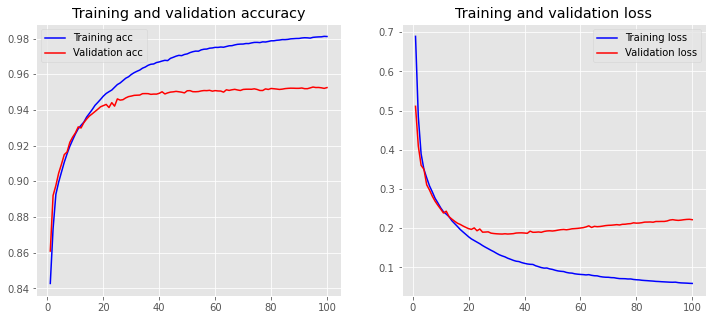

In [153]:
plot_history(history)

In [155]:
# Next: inference mode (sampling).
# Here's the drill:
# 1) encode input and retrieve initial decoder state
# 2) run one step of decoder with this initial state
# and a "start of sequence" token as target.
# Output will be the next target token
# 3) Repeat with the current target token and current states

# Define sampling models
encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

# Reverse-lookup token index to decode sequences back to
# something readable.
reverse_input_char_index = dict(
    (i, char) for char, i in input_token_index.items())
reverse_target_char_index = dict(
    (i, char) for char, i in target_token_index.items())

In [158]:

def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, target_token_index['^']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '⊗' or
           len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        # Update states
        states_value = [h, c]

    return decoded_sentence


for seq_index in range(200):
    # Take one sequence (part of the training set)
    # for trying out decoding.
    input_seq = encoder_input_data[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print('-')
    print('Input sentence:', input_texts[seq_index])
    print('Target sentence:', target_texts[seq_index])    
    
    print('Decoded sentence:', decoded_sentence)
    print('Decoded sentence len:', len(decoded_sentence))    

-
Input sentence: ^Jumby now wants to be born .⊗
Target sentence: ^Jumby want birth .⊗
Decoded sentence: That 's a nice name .⊗
Decoded sentence len: 22
-
Input sentence: ^It was a difficult and long delivery .⊗
Target sentence: ^The delivery was difficult and long .⊗
Decoded sentence: That 's a nice name .⊗
Decoded sentence len: 22
-
Input sentence: ^I like to be beautiful everyday .⊗
Target sentence: ^I like to be pretty everyday .⊗
Decoded sentence: I was startilly .⊗
Decoded sentence len: 18
-
Input sentence: ^Bernadette wants a prenup .⊗
Target sentence: ^Bernadette wants to get a prenup .⊗
Decoded sentence: That 's a nice name .⊗
Decoded sentence len: 22
-
Input sentence: ^Don 't say you don 't remember me .⊗
Target sentence: ^Don 't tell me you don 't remember me .⊗
Decoded sentence: Don 't you forget it .⊗
Decoded sentence len: 23
-
Input sentence: ^Hyah ! Hmm .⊗
Target sentence: ^Wiggle your big toe .⊗
Decoded sentence: Everyone has secrets .⊗
Decoded sentence len: 23
-
Input 

-
Input sentence: ^Will you tell her ?⊗
Target sentence: ^You gonna tell her ?⊗
Decoded sentence: You got any kids ?⊗
Decoded sentence len: 19
-
Input sentence: ^She 's fainted .⊗
Target sentence: ^She passed out .⊗
Decoded sentence: She 's gonna be okay .⊗
Decoded sentence len: 23
-
Input sentence: ^We know everything .⊗
Target sentence: ^We know it all .⊗
Decoded sentence: We 're gonna do our best .⊗
Decoded sentence len: 27
-
Input sentence: ^He 's a criminal .⊗
Target sentence: ^He 's a felon .⊗
Decoded sentence: He 's gonna be okay .⊗
Decoded sentence len: 22
-
Input sentence: ^The witness may step down .⊗
Target sentence: ^Witness is excused .⊗
Decoded sentence: The tool with you .⊗
Decoded sentence len: 20
-
Input sentence: ^Anchors aweigh .⊗
Target sentence: ^Weigh anchor .⊗
Decoded sentence: And what happened then ?⊗
Decoded sentence len: 25
-
Input sentence: ^Nothing 's going to happen to me .⊗
Target sentence: ^Nothing will happen to me .⊗
Decoded sentence: Nothing will chan

-
Input sentence: ^You didn 't see anything .⊗
Target sentence: ^You saw nothing .⊗
Decoded sentence: You should know .⊗
Decoded sentence len: 18
-
Input sentence: ^Did you have something to do that ?⊗
Target sentence: ^You had something to do with that ?⊗
Decoded sentence: You didn 't notice ?⊗
Decoded sentence len: 21
-
Input sentence: ^We were getting married .⊗
Target sentence: ^We were gonna get married .⊗
Decoded sentence: We don 't have any other choice .⊗
Decoded sentence len: 34
-
Input sentence: ^You had no choice .⊗
Target sentence: ^You were left absent choice .⊗
Decoded sentence: You 're not gonna believe this .⊗
Decoded sentence len: 33
-
Input sentence: ^What did he say exactly ?⊗
Target sentence: ^What exactly did he say ?⊗
Decoded sentence: What do you fear ?⊗
Decoded sentence len: 19
-
Input sentence: ^I 'm not gonna kill you .⊗
Target sentence: ^I ain 't going to kill you .⊗
Decoded sentence: I don 't feel very well .⊗
Decoded sentence len: 26
-
Input sentence: ^All 

-
Input sentence: ^What are you going to tell him ?⊗
Target sentence: ^What will you tell him ?⊗
Decoded sentence: What do you fear ?⊗
Decoded sentence len: 19
-
Input sentence: ^How about a little music ?⊗
Target sentence: ^How about some music ?⊗
Decoded sentence: How much time have we got ?⊗
Decoded sentence len: 28
-
Input sentence: ^You didn 't have a choice .⊗
Target sentence: ^You had no choice .⊗
Decoded sentence: You should know .⊗
Decoded sentence len: 18
-
Input sentence: ^You see what I see ?⊗
Target sentence: ^You seeing what I 'm seeing ?⊗
Decoded sentence: You 're not gonna believe this .⊗
Decoded sentence len: 33
-
Input sentence: ^Is he gonna die ?⊗
Target sentence: ^Will he die ?⊗
Decoded sentence: Will he be all right ?⊗
Decoded sentence len: 23
-
Input sentence: ^We live at No. 7 Vicenza Platz .⊗
Target sentence: ^We live at number 7 , Vicenza Platz .⊗
Decoded sentence: We 're gonna do our best .⊗
Decoded sentence len: 27
-
Input sentence: ^Who 'd like to start ?⊗
T